<a href="https://colab.research.google.com/github/rids15/SentimentAnalyzer/blob/master/SentimentAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install pandas
! pip install tweepy
! pip install vaderSentiment



    100% |████████████████████████████████| 133kB 6.2MB/s 


In [3]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
API_KEY = 'UzkNXb1l77ErH7xh01HN7EGlA'
API_SECRET = '5PeGiMOiAYUL5LpyEOSkv8gcDSfFcq5Ghpysy43bitHmY1BfFg'

ACCESS_KEY= '2270562236-wXY5wJl0HfSv8NVYUEhAbAPqWXfsoh4x3ykrSDk'
ACCESS_TOKEN = 'VaDYmryfcmtku8NTDlEfMcaUsS5u3JzuBfYavvvKvA79H'

In [14]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_TOKEN)

api = tweepy.API(auth, wait_on_rate_limit=True)
search_words="#Kohli"
new_search = search_words + " -filter:retweets"
tweets = api.search(new_search, count=1000)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))
print(tweets[0].created_at)

,Tweets
0,RCB VS KXIP.\n\nhttps://t.co/Z7z2wQweII\n#ipl ...
1,@Amazing20033974 #RCB gotta #PlayItBold \n\nTh...
2,#ViratKohli ahead of #Dhoni as captain !!!\nht...
3,Why do we have to resort to players like #Rayu...
4,RCB need to win 6 out of 7 games!! Can they qu...
5,RCB टीम में कूल्टर नाइल की जगह इस गेंदबाज को क...
6,IPL Streaming is On!\n.\nSupport your favorite...
7,#ronaldo #ronaldo9 #ronaldocr7 #ronaldonazario...
8,@gpappliances @ChennaiIPL 🏆🥇WILL WIN IPL 2019...
9,It is make or break for the Royals today! And ...


2019-04-13 12:20:05


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
#Kohli Pos 9.1 neutral 69.20099999999998 neg 2.6979999999999995 compound 16.353900000000003


Text(0.5, 1.0, 'Sentiment of 100 Tweets about #Kohli')

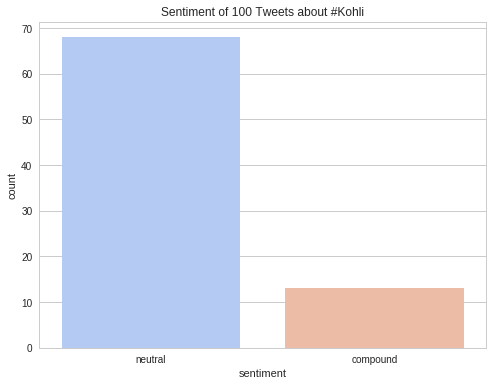

In [15]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
sns.set_style("whitegrid")

nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

sid = SentimentIntensityAnalyzer()

op = []
pos = []
neg = []
neu = []
compound = []

for index,row in data.iterrows():
  ss = sid.polarity_scores(row['Tweets'])
  pos.append(ss['pos'])
  neg.append(ss['neg'])
  neu.append(ss['neu'])
  compound.append(ss['compound'])
  op.append(ss)
  
se = pd.Series(op)
sp = pd.Series(pos)
sneu = pd.Series(neu)
sneg = pd.Series(neg)
scmp = pd.Series(compound)
data['polarity']=se.values
data['positive']=sp.values
data['neutral']=sneu.values
data['negative']=sneg.values
data['compound']=scmp.values


print(search_words, 'Pos', sum(pos), 'neutral', sum(neu), 'neg' , sum(neg), 'compound' , sum(compound));


data_partial = data[['negative','neutral','positive','compound']]
data['sentiment'] = data_partial.idxmax(axis=1)

plt.figure(figsize=(8,6))
sns.countplot(data.sentiment, orient="h", palette='coolwarm', saturation=0.75)
plt.title('Sentiment of ' + str(100) + ' Tweets about ' + search_words)


# display(data.head(1000))



In [0]:
# api.update_status('Yeah!...check out this')

Status(_api=<tweepy.api.API object at 0x7fa9ce7cbd30>, _json={'created_at': 'Sat Apr 13 03:50:39 +0000 2019', 'id': 1116911549619138560, 'id_str': '1116911549619138560', 'text': 'Yeah!...I am sening tweet from python', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.lolzor.com" rel="nofollow">sentiment_funanalyze</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2270562236, 'id_str': '2270562236', 'name': 'riddhi patel', 'screen_name': 'riddhi_patel20', 'location': 'Hyderabad, India', 'description': '@iiit_hyderabad', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 13, 'friends_count': 376, 'listed_count': 0, 'created_at': 'Tue Dec 31 16:24:35 +0000 2013', 'favourites_count': 14, 'utc_offset': None, 'time_zone': None, 'geo_enable